<a href="https://colab.research.google.com/github/gogowonji/Machine-Learning-with-Python/blob/main/ch2_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install mglearn
import mglearn # github clone

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1c00c1a8f2f2c78aef49e3e5416933e8c46e8e36603eec4dd19d65e7ef41fdac
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


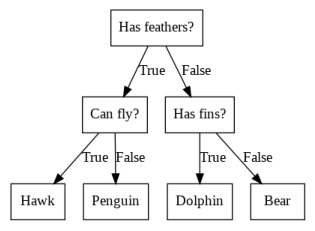

In [ ]:
mglearn.plots.plot_animal_tree()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("사전 가지치기 훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("사전 가지치기 테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937
사전 가지치기 훈련 세트 정확도: 0.988
사전 가지치기 테스트 세트 정확도: 0.951


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names = cancer.feature_names, impurity=True, filled=True)

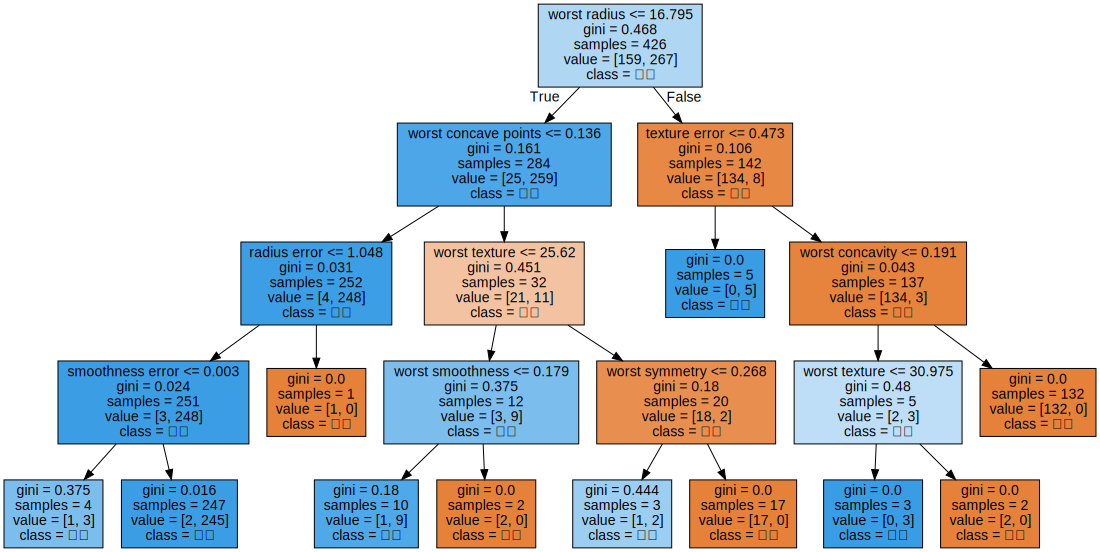

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


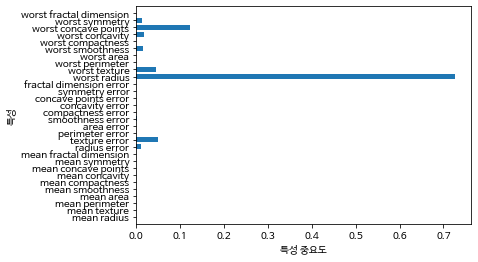

In [ ]:
# 특성 중요도 시각화
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


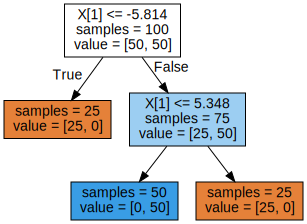

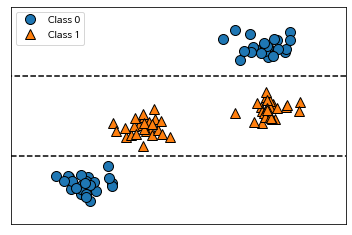

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, '가격 ($/Mbyte)')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


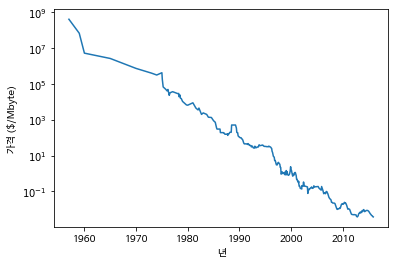

In [ ]:
# 컴퓨터 메모리 가격 동향
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
# y축 : 로그 스케일
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


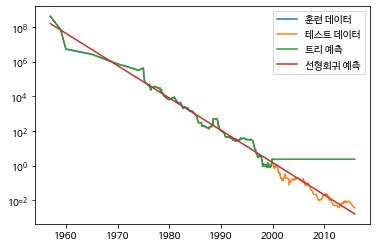

In [ ]:
# 2000년 전 후 가격 예측
# DecisionTreeRegressor와 Linear Regression 비교
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련데이터, 2000년 이후를 테스트 데이터로..
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# train
# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)


# predict
# 전체 기간에 대해서 수행
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값 -> 로그 스케일로 되돌림 (지수함수)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# 시각화
plt.semilogy(data_train.date, data_train.price, label = "훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label = "테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "트리 예측")
plt.semilogy(ram_prices.date, price_lr , label = "선형회귀 예측")
plt.legend()

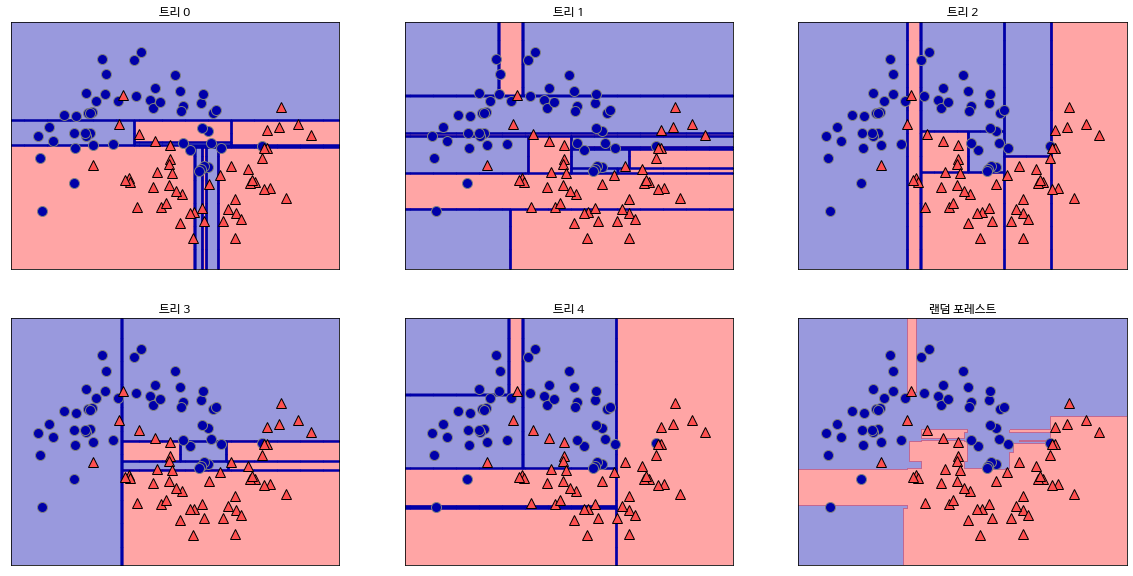

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


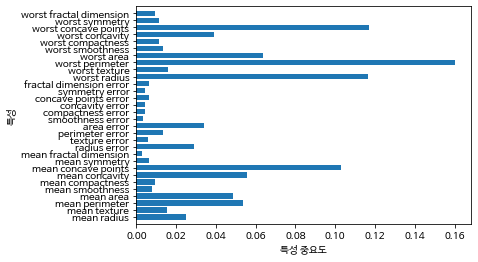

In [ ]:
plot_feature_importances_cancer(forest)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)

# 기본값 n_estimators=100, max_depth=3, learning_rate=0.1
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


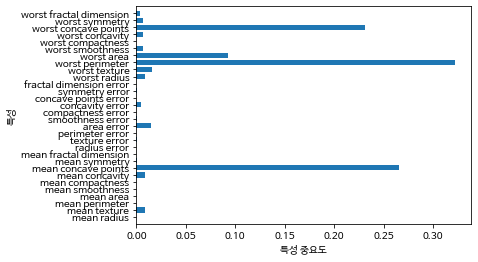

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

In [8]:
#from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples =100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# logistic regression 모델 앙상블 (cancer)
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [12]:
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("oob샘플 세트 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 0.953
테스트 세트 정확도 : 0.958
oob샘플 세트 정확도 : 0.941


TypeError: ignored

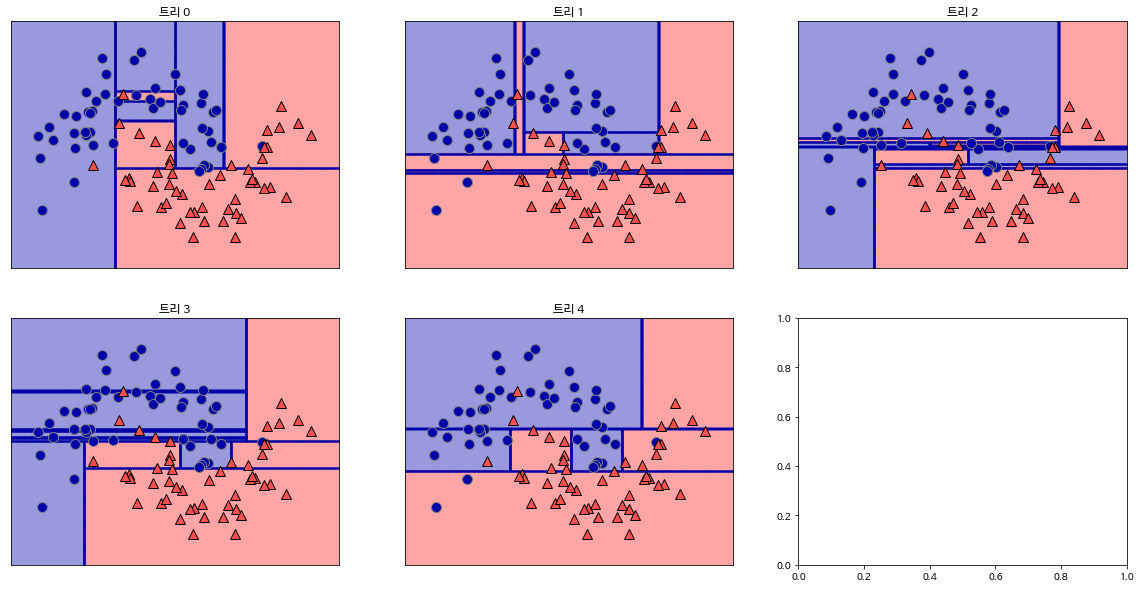

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# 결정 트리 앙상블 - 배깅 (moon)
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1,random_state=42)
bagging.fit(Xm_train, ym_train)

# 결정 경계 시각화
fig,axes = plt.subplots(2,3,figsize=(20,10))

for i, (ax,tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [24]:
# 결정 트리 앙상블 - 배깅 (cancer)
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs =-1, random_state=42, max_samples=100)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("oob샘플 세트 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 0.979
테스트 세트 정확도 : 0.965
oob샘플 세트 정확도 : 0.948


In [28]:
# 엑스트라 트리 (moon) - 바로 적용 가능
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train,ym_train)


ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

TypeError: ignored

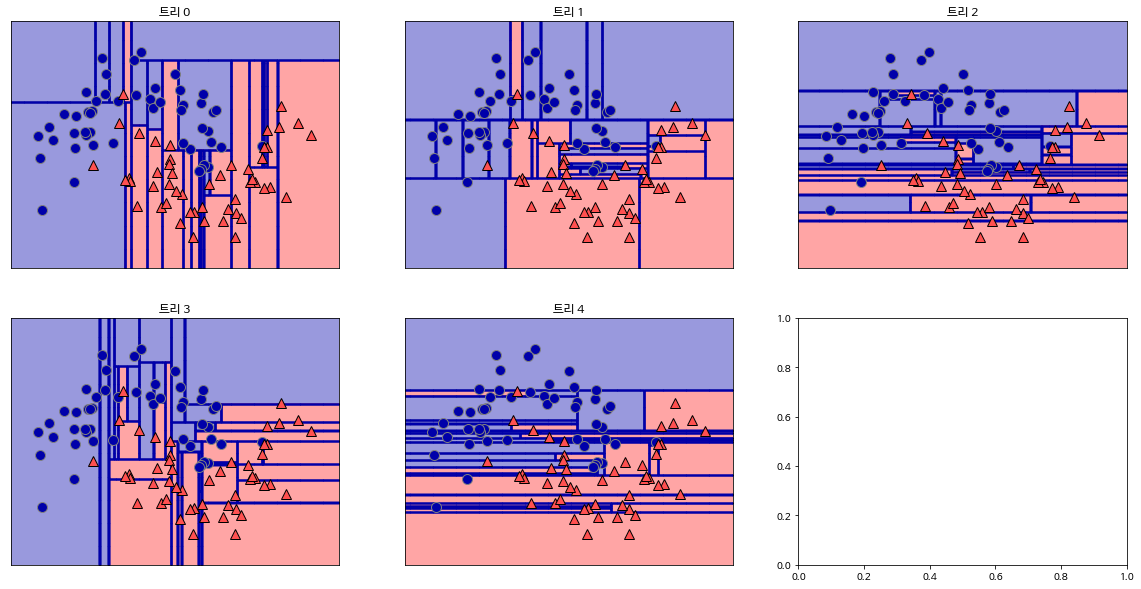

In [31]:
# 결정 경계 시각화
fig,axes = plt.subplots(2,3,figsize=(20,10))

for i, (ax,tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [32]:
# 엑스트라 트리 (cancer)
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train,yc_train)

print("훈련 세트 정확도 : {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


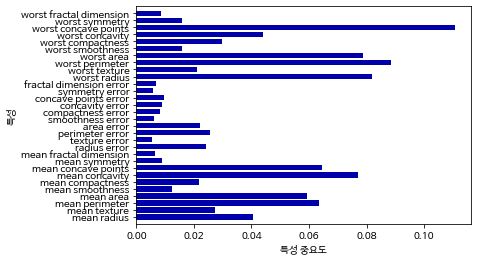

In [35]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

TypeError: ignored

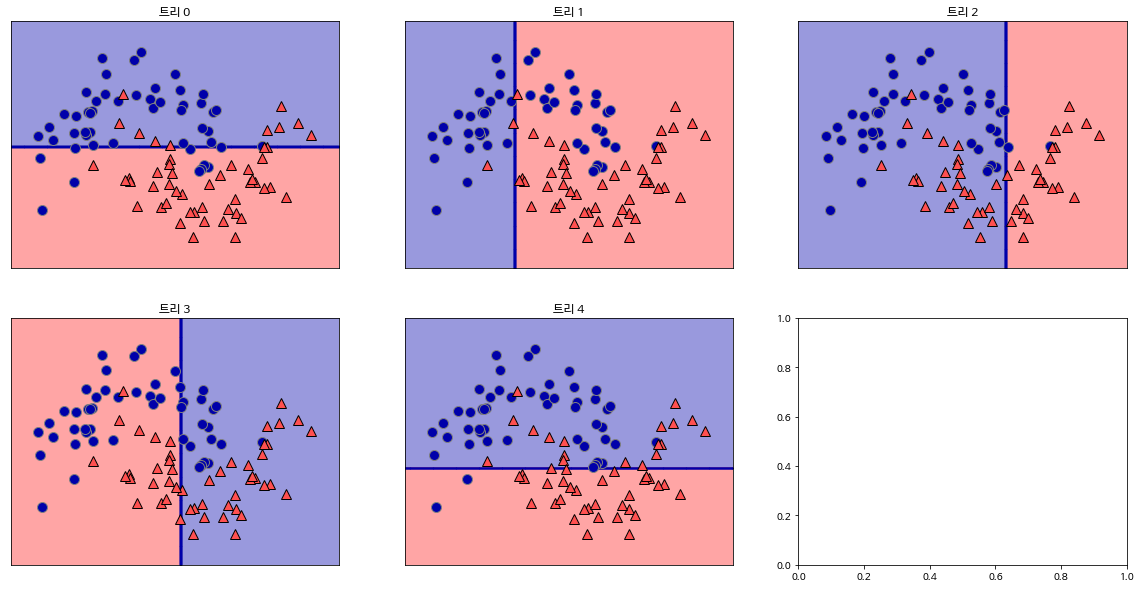

In [37]:
# 에이다부스트 (moon)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

# 결정 경계 시각화
fig,axes = plt.subplots(2,3,figsize=(20,10))

for i, (ax,tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [41]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train,yc_train)
print("훈련 세트 정확도 : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


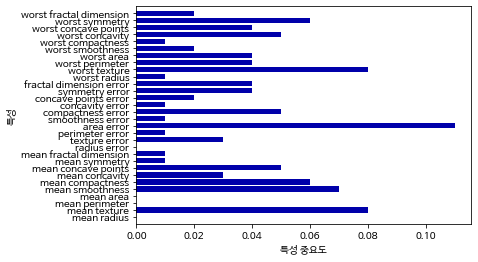

In [42]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()